# Data Understanding Notebook

The goal of this notebook is to understand the given dataset. Complementary, also information found on the internet has completed this analysis

In [3]:
%matplotlib inline 
import numpy as np   # generic stuff
import matplotlib.pyplot as plt

#### REMOVE THIS LINE BEFORE SUBMISSION
import pandas as pd
#######################################################################

from lib.proj1_helpers import * #the helper provided for the project

from implementations import * #our implementations of the functions done by us
import datetime
from helpers import * #helpers of exo 2
# Useful starting lines

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [4]:
import csv
def load_csv_data(data_path, sub_sample=False):
    """Loads data and returns y (class labels), tX (features) and ids (event ids)"""
    y = np.genfromtxt(data_path, delimiter=",", skip_header=1, dtype=str, usecols=1)
    x = np.genfromtxt(data_path, delimiter=",", skip_header=1)
    ids = x[:, 0].astype(np.int)
    input_data = x[:, 2:]

    # convert class labels from strings to binary (-1,1)
    yb = np.ones(len(y))
    yb[np.where(y=='b')] = -1
    
    # sub-sample
    if sub_sample:
        yb = yb[::50]
        input_data = input_data[::50]
        ids = ids[::50]

    return yb, input_data, ids

In [5]:
DATA_FOLDER = 'data/'
data_file = DATA_FOLDER+'test.csv'

y_trai, tx_train, ids_train = load_csv_data(DATA_FOLDER+'train.csv',sub_sample=False)

y_test, tx_test, ids_test = load_csv_data(DATA_FOLDER+'test.csv',sub_sample=False)

AAA = 0
BBB = 0

In [6]:
train = pd.DataFrame(tx_train)
y_train = pd.DataFrame(y_trai)
test = pd.DataFrame(tx_test)
y_test = pd.DataFrame(y_test)
train.head()
train.shape

(250000, 30)

In [7]:
 ########## to extract name of columns ############################
#data_file =DATA_FOLDER +'train.xls'
#train = pd.read_excel(data_file)
#data_file =DATA_FOLDER +'test.xls'
#test = pd.read_excel(data_file)
#test.columns
#train.columns

In [8]:
columns = ['Id', 'Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']

desired_cols = ['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']


In [9]:
train.columns = desired_cols
test.columns = desired_cols
y_train.columns = ['Prediction']

In [10]:
train.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2.0,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1.0,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1.0,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [11]:
#y.head(10)

## now a generic part: 


In [12]:
### run this line if you wanna add the indexes
BBB = 0

In [13]:
train_ori = train.copy()
test_ori = test.copy()
if BBB == 0:
    train.reset_index(drop=False,inplace=True)
    test.reset_index(drop=False,inplace=True)
    y_train.reset_index(drop=False,inplace=True)
    y_test.reset_index(drop=False,inplace=True)
train.replace(-999, np.nan,inplace=True)
test.replace(-999, np.nan,inplace=True)

In [14]:
def jet_separation(data):
    jet0 = data[data['PRI_jet_num'] == 0]
    jet1 = data[data['PRI_jet_num'] == 1]
    jet2 = data[data['PRI_jet_num'] == 2]
    jet3 = data[data['PRI_jet_num'] == 3]
    tot = jet0.shape[0]+jet1.shape[0]+jet2.shape[0]+jet3.shape[0]
    
    print('Data: {data}\n jet0: {j0}\n jet1: {j1}\n jet2: {j2}\n jet3: {j3}\ntotat= {tot}'.format\
          (data=data.shape, j0=jet0.shape, j1=jet1.shape, j2=jet2.shape, j3=jet3.shape, tot=tot))
    
    return jet0, jet1, jet2, jet3

In [15]:
train_tot = pd.merge(y_train,train, left_on='index', right_on='index', how = 'right')

In [16]:
jet0, jet1, jet2, jet3 = jet_separation(train_tot)

Data: (250000, 32)
 jet0: (99913, 32)
 jet1: (77544, 32)
 jet2: (50379, 32)
 jet3: (22164, 32)
totat= 250000


In [17]:
#print(jet3.info())
jet0.describe()

,index,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,99913.000000,99913.000000,73790.000000,99913.000000,99913.000000,99913.000000,0.0,0.0,0.0,99913.000000,...,99913.000000,99913.00000,99913.0,0.0,0.0,0.0,0.0,0.0,0.0,99913.0
mean,124892.549558,-0.489716,120.667654,58.786239,81.870309,13.823867,NaN,NaN,NaN,2.664961,...,-0.024443,125.86081,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
std,72138.199984,0.871886,51.750062,32.003551,38.043669,16.674707,NaN,NaN,NaN,0.693295,...,1.811006,53.08660,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,3.000000,-1.000000,9.044000,0.002000,7.120000,0.000000,NaN,NaN,NaN,0.277000,...,-3.142000,13.67800,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
25%,62434.000000,-1.000000,90.241000,35.062000,60.947000,2.275000,NaN,NaN,NaN,2.338000,...,-1.583000,87.95100,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
50%,124898.000000,-1.000000,111.452000,62.144000,75.533000,6.677000,NaN,NaN,NaN,2.822000,...,-0.051000,119.47900,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
75%,187392.000000,1.000000,137.388500,79.650000,94.135000,24.202000,NaN,NaN,NaN,3.095000,...,1.546000,156.41800,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
max,249999.000000,1.000000,863.647000,570.115000,1349.351000,2834.999000,NaN,NaN,NaN,5.684000,...,3.142000,1391.52900,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [18]:
### run this line if you wanna add the index line
AAA = 0

In [19]:
y_train.columns

Index(['index', 'Prediction'], dtype='object')

In [20]:
def proportions(train, y_train, num_jet):
    num_back = y_train[train['PRI_jet_num']==num_jet].Prediction.value_counts()[-1]
    num_signal = y_train[train['PRI_jet_num']== num_jet].Prediction.value_counts()[1]
    prop = num_signal/(num_back+num_signal)
    print('Proportions of signal for jet{jet} are: {prop}'.format(jet=num_jet, prop=prop))

In [21]:
proportions(train, y_train, num_jet=0)
proportions(train, y_train, num_jet=1)
proportions(train, y_train, num_jet=2)
proportions(train, y_train, num_jet=3)

Proportions of signal for jet0 are: 0.2551419735169598
Proportions of signal for jet1 are: 0.35734550706695556
Proportions of signal for jet2 are: 0.5108080747930686
Proportions of signal for jet3 are: 0.3036906695542321


In [22]:
jet1['DER_mass_MMC'].describe()

count    69982.000000
mean       122.182109
std         59.344924
min          9.806000
25%         92.153250
50%        112.405500
75%        136.131750
max       1192.026000
Name: DER_mass_MMC, dtype: float64

In [23]:
train.columns

Index(['index', 'DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [24]:
lala = pd.merge(y_train,train, left_on='index', right_on='index', how = 'right')
background = lala[lala['Prediction']==-1.0]
signal = lala[lala['Prediction']==1.0]
background

,index,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
1,1,-1.0,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,...,-1.916,164.546,1.0,46.226,0.725,1.158,NaN,NaN,NaN,46.226
2,2,-1.0,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,...,-2.186,260.414,1.0,44.251,2.053,-2.028,NaN,NaN,NaN,44.251
3,3,-1.0,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,...,0.060,86.062,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4,4,-1.0,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,...,-0.871,53.131,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
5,5,-1.0,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,...,2.237,282.849,3.0,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
8,8,-1.0,105.594,50.559,100.989,4.288,NaN,NaN,NaN,2.904,...,0.024,129.804,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
10,10,-1.0,NaN,86.240,79.692,27.201,NaN,NaN,NaN,2.338,...,0.688,250.178,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
11,11,-1.0,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,...,2.148,290.547,3.0,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640
12,12,-1.0,145.297,64.234,103.565,106.999,NaN,NaN,NaN,2.183,...,-1.907,232.362,1.0,93.117,-0.970,1.943,NaN,NaN,NaN,93.117
13,13,-1.0,82.488,31.663,64.128,8.232,NaN,NaN,NaN,2.823,...,1.433,163.420,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000


In [25]:
signal

,index,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,0,1.0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,...,-0.277,258.733,2.0,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
6,6,1.0,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,...,-1.443,294.074,2.0,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
7,7,1.0,154.916,10.418,94.714,29.169,NaN,NaN,NaN,2.897,...,-1.761,187.299,1.0,30.638,-0.715,-1.724,NaN,NaN,NaN,30.638
9,9,1.0,128.053,88.941,69.272,193.392,NaN,NaN,NaN,1.609,...,0.845,294.741,1.0,167.735,-2.767,-2.514,NaN,NaN,NaN,167.735
15,15,1.0,111.026,32.096,75.271,23.067,NaN,NaN,NaN,3.205,...,2.415,122.176,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
17,17,1.0,127.861,50.953,77.267,26.967,NaN,NaN,NaN,2.833,...,-2.975,211.720,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
23,23,1.0,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,...,-0.973,454.785,2.0,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009
26,26,1.0,137.197,68.009,78.296,35.332,NaN,NaN,NaN,2.883,...,-2.891,82.224,1.0,35.527,4.347,-0.169,NaN,NaN,NaN,35.527
27,27,1.0,111.271,27.180,70.642,144.766,4.936,1021.322,-5.834,1.795,...,-1.173,289.876,2.0,170.712,-1.961,2.220,43.458,2.974,-0.103,214.170
28,28,1.0,118.104,2.633,77.310,91.388,NaN,NaN,NaN,1.976,...,-1.127,175.843,1.0,77.221,-0.049,1.426,NaN,NaN,NaN,77.221


In [26]:
### void code just to copy-paste
axes = ax1[0].gca()
axes.set_xlim([xmin,xmax])
axes.set_ylim([ymin,ymax])


ax1 = plt.subplot(311)
plt.plot(t, s1)
plt.setp(ax1.get_xticklabels(), fontsize=6)

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(t, s2)
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

# share x and y
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(t, s3)
plt.xlim(0.01, 5.0)
plt.show()

NameError: name 'ax1' is not defined

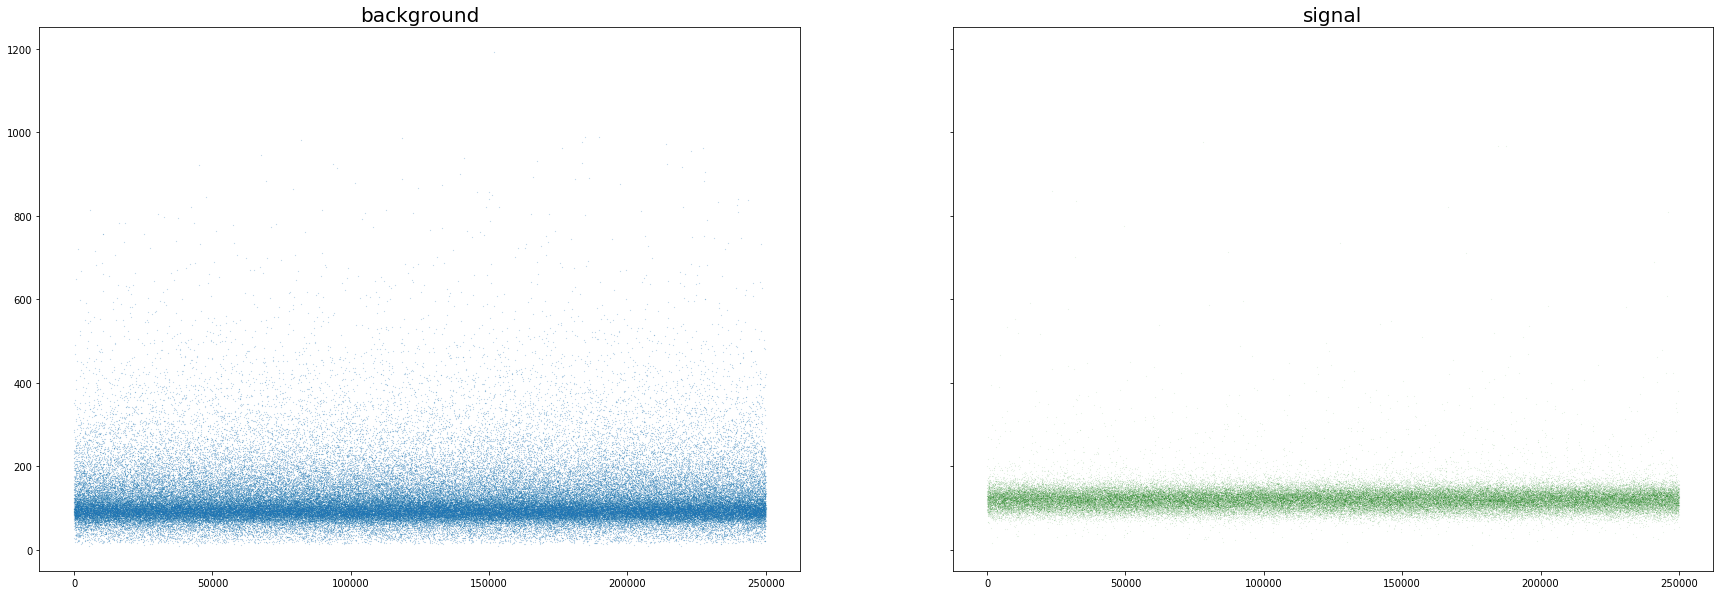

In [27]:
column = 'DER_mass_MMC'
fig1, ax1 = plt.subplots(1,2,sharey='row');
fig1.set_figheight(10)
fig1.set_figwidth(30)
ax1[0].scatter(background['index'],background[column],s=0.01);
ax1[0].set_title('background',fontsize=20)
ax1[1].scatter(signal['index'],signal[column],color='g',s=0.001);
ax1[1].set_title('signal',fontsize=20)


In [28]:
background.shape[0], signal.shape[0] ,background.sort_values([column]).shape[0]

(164333, 85667, 164333)

In [159]:
import seaborn as sns

sns.set()


def tick_format(plot,tick_type):
    if tick_type == 1:
        for label in plot.get_xticklabels():
            label.set_fontsize(16)
            label.set_rotation(90)
            
        for label in plot.get_yticklabels():
            label.set_fontsize(14)
        
    if tick_type == 2:
        for label in plot.get_xticklabels():
            label.set_fontsize(16)

        for label in plot.get_yticklabels():
            label.set_fontsize(14)
    
    if tick_type == 3:
        for label in plot.get_xticklabels():
            label.set_fontsize(13)

        for label in plot.get_yticklabels():
            label.set_fontsize(13)
    
    if tick_type == 4:
        for label in plot.get_xticklabels():
            label.set_fontsize(13)
            label.set_rotation(90)
            
        for label in plot.get_yticklabels():
            label.set_fontsize(13)
    
    if tick_type == 5:
        for label in plot.get_xticklabels():
            label.set_fontsize(14)
                     
        for label in plot.get_yticklabels():
            label.set_fontsize(12)
            label.set_rotation(30)

def give_bins_column(df,column,bin_num):
    sorted_col = df.sort_values([column])[column]
    minBin = sorted_col.min()
    maxBin = sorted_col.max()
    bins = np.linspace(minBin, maxBin, bin_num)
    return pd.cut(sorted_col,bins)

In [179]:
signal.columns

Index(['index', 'Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [238]:
categorical = ['PRI_jet_num']

special = ['DER_mass_MMC'] #our special case

string = ['DER_mass_transverse_met_lep','DER_mass_vis','DER_deltaeta_jet_jet','PRI_jet_leading_eta',\
         'PRI_jet_subleading_eta'] # interesting behavior

moyen = ['DER_prodeta_jet_jet','DER_deltar_tau_lep','DER_pt_tot','DER_sum_pt','PRI_met_sumet'] # some interesting differences

bof = ['DER_pt_h','DER_mass_jet_jet','DER_pt_ratio_lep_tau','DER_lep_eta_centrality',\
      'PRI_tau_pt','PRI_tau_eta','PRI_lep_pt','PRI_lep_eta',\
      'PRI_met','PRI_jet_leading_pt','PRI_jet_subleading_pt','PRI_jet_all_pt'] # similar distribution

not_important_to_me = ['PRI_jet_subleading_phi','PRI_jet_leading_phi','PRI_met_phi',\
                       'PRI_lep_phi','PRI_tau_phi','DER_met_phi_centrality'] # about the same distribution

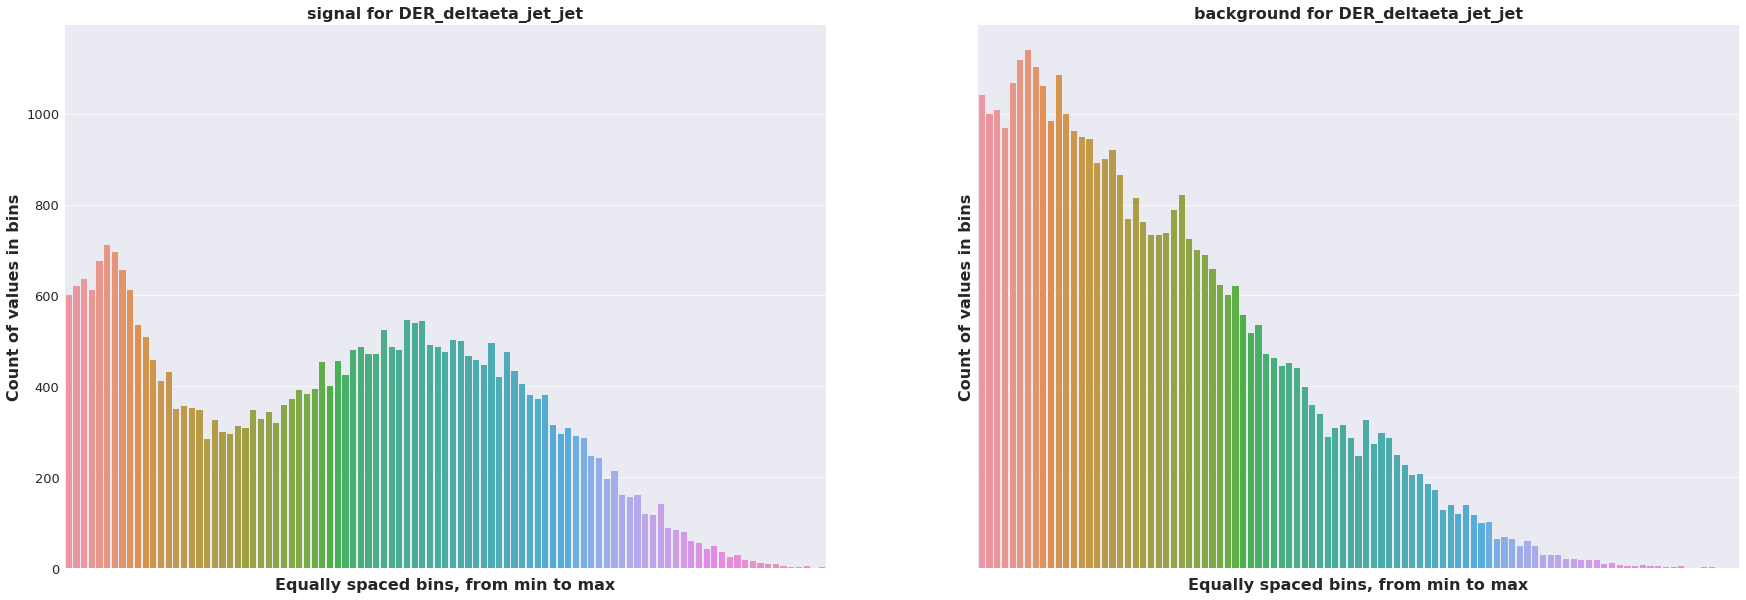

In [237]:
column = 'DER_deltaeta_jet_jet'
bin_num = 100

fig1, ax1 = plt.subplots(1,2,sharex='row',sharey='row')
fig1.set_figheight(10)
fig1.set_figwidth(30)

#ax1[0].set(xscale="log", yscale="log")
#ax1[1].set_xticklabels([])

#tick_format(ax1[0], 3)
def my_count_plot(df,name,pos):
    sns.countplot(give_bins_column(df,column,bin_num), ax = ax1[pos])
    #ax1[pos].set(xticks=np.linspace(1,bin_num,5))
    ax1[pos].set_xticklabels([])
    ax1[pos].set_xlabel( 'Equally spaced bins, from min to max' ,fontsize=16).set_weight('bold')
    ax1[pos].set_ylabel('Count of values in bins', fontsize=16).set_weight('bold')
    ax1[pos].set_title(name+' for '+column, fontsize=16).set_weight('bold')
    for label in ax1[pos].get_xticklabels():
            label.set_fontsize(13)
    for label in ax1[pos].get_yticklabels():
            label.set_fontsize(13)

my_count_plot(signal,'signal',pos=0)
my_count_plot(background,'background',pos=1)

In [33]:
print(signal.DER_mass_MMC.quantile(.75),'\n',background.DER_mass_MMC.quantile(.75))
print ('NAN in signal: ',signal['DER_mass_MMC'].isnull().sum(), \
       '         NAN in background: ',background['DER_mass_MMC'].isnull().sum() )

135.27824999999999 
 135.94125
NAN in signal:  2835          NAN in background:  35279


In [34]:
signal['PRI_lep_phi'].describe()

count    85667.000000
mean         0.053923
std          1.813160
min         -3.142000
25%         -1.502000
50%          0.103000
75%          1.627500
max          3.142000
Name: PRI_lep_phi, dtype: float64

In [35]:
background['PRI_lep_phi'].describe()

count    164333.000000
mean          0.038132
std           1.818390
min          -3.142000
25%          -1.534000
50%           0.076000
75%           1.612000
max           3.142000
Name: PRI_lep_phi, dtype: float64

In [36]:
train.columns

Index(['index', 'DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [37]:
31//3

10

## some test to extract the name of data for the plotting

In [38]:
import inspect

x,y,z = 1,2,3

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

retrieve_name(train)[0]

'train'

In [39]:
# Test funtion to visualize the dataset 
def plots_values_train_test(data):
    needed_subplots = (len(data.columns)-1)//3+1 # the first column being the index
    for k in range (needed_subplots):
        fig1, ax1 = plt.subplots(1,3)
        fig1.set_figheight(10)
        fig1.set_figwidth(30)

        for i,column in enumerate(data.columns[1+3*k:3*(k+1)+1]):
            ax1[i].set_title('Values in column {}'.format(column),fontsize=20,fontweight="bold")
            ax1[i].scatter(train['index'],train.sort_values([column])[column])

            
        #fig1.savefig('values{}.png'.format(k))
            #for j in range(len(texts)):
             #   texts[j].set_fontsize(15)
              #  autotexts[j].set_fontsize(15)

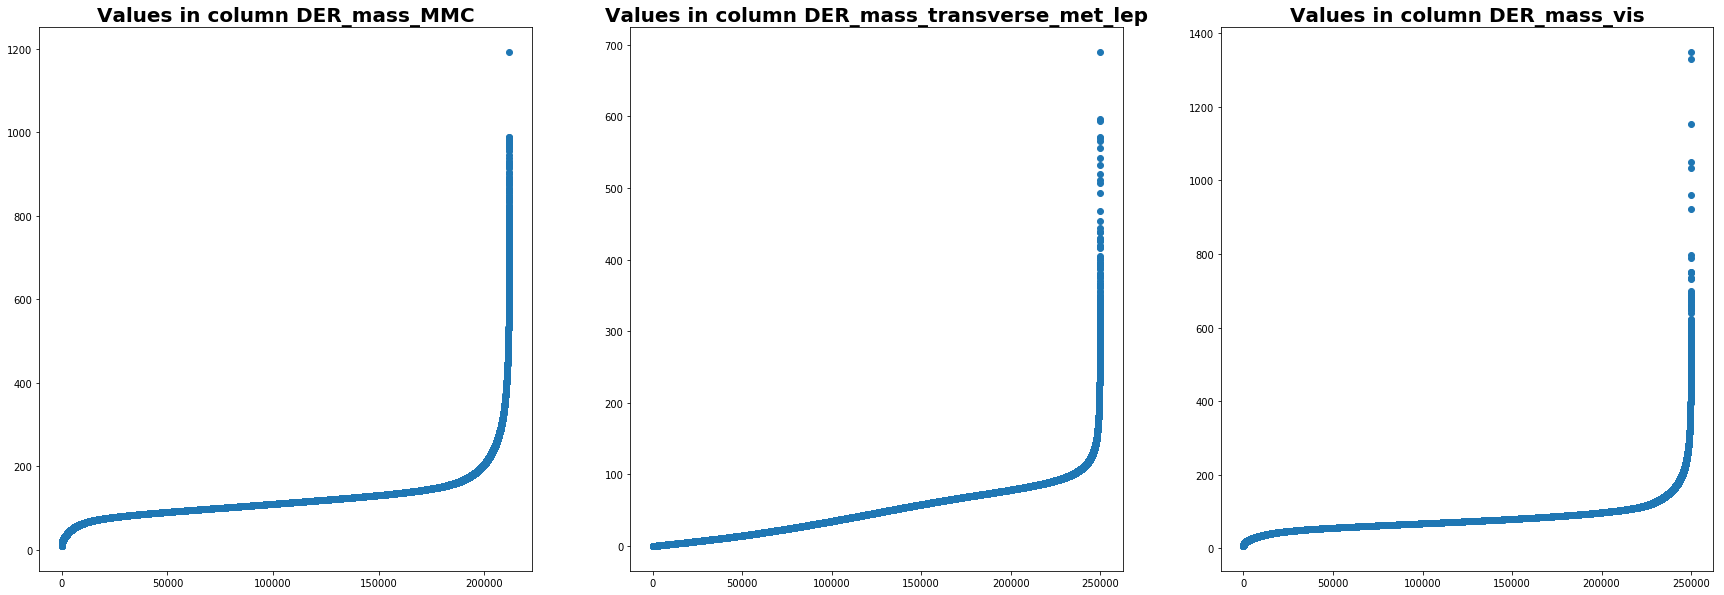

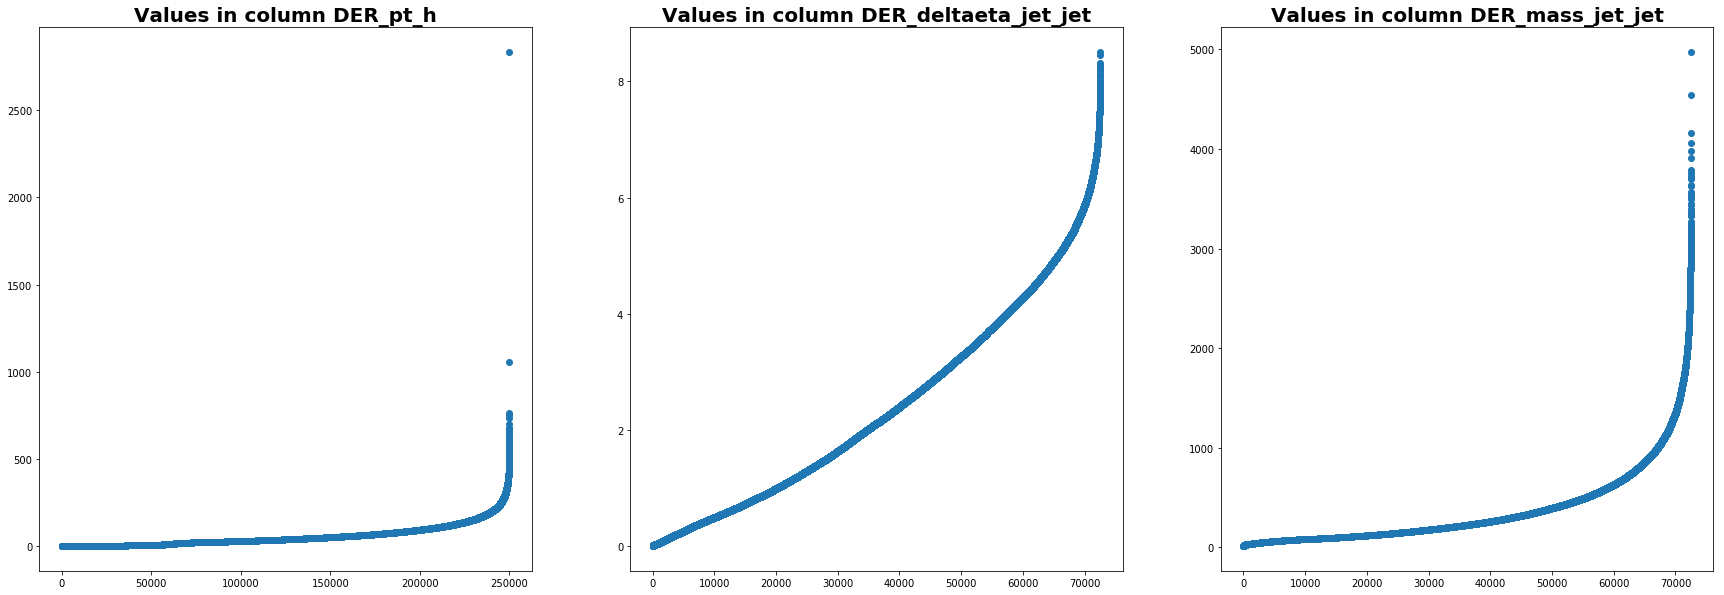

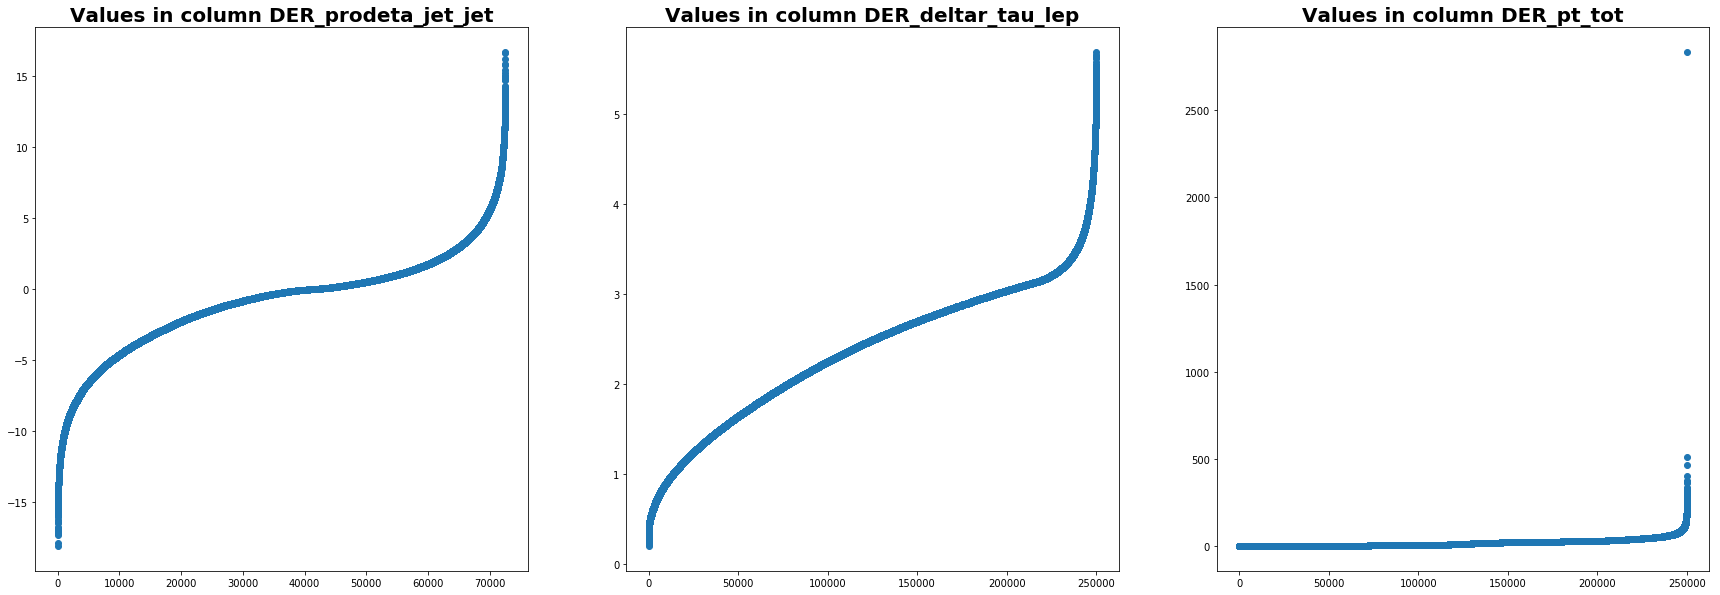

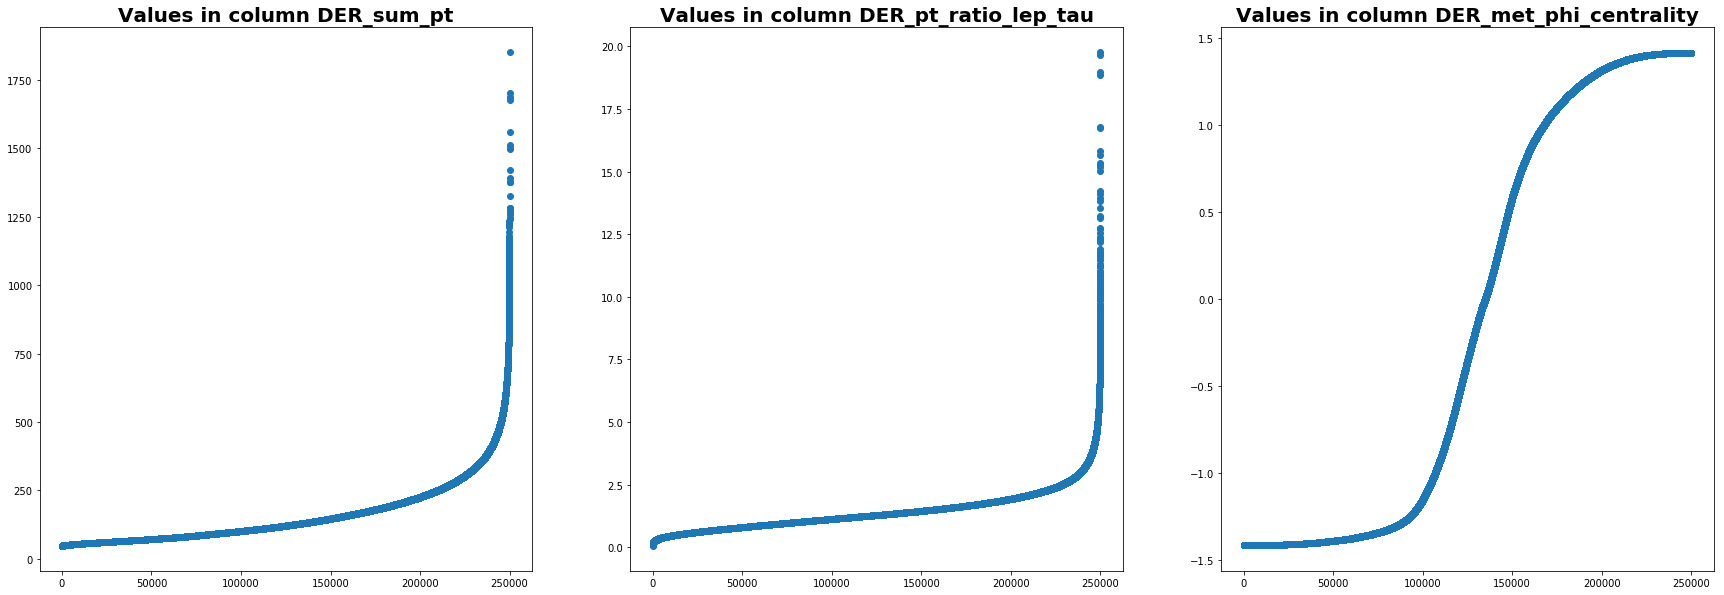

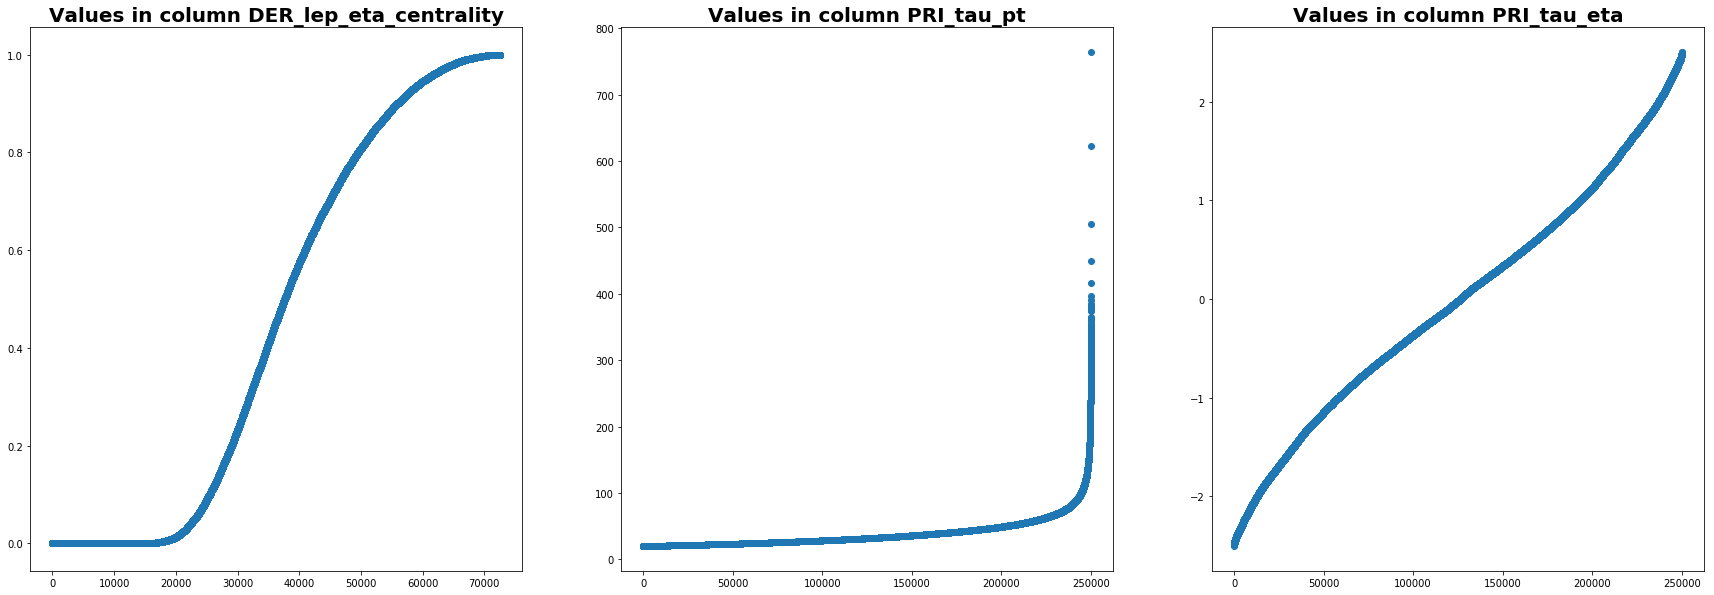

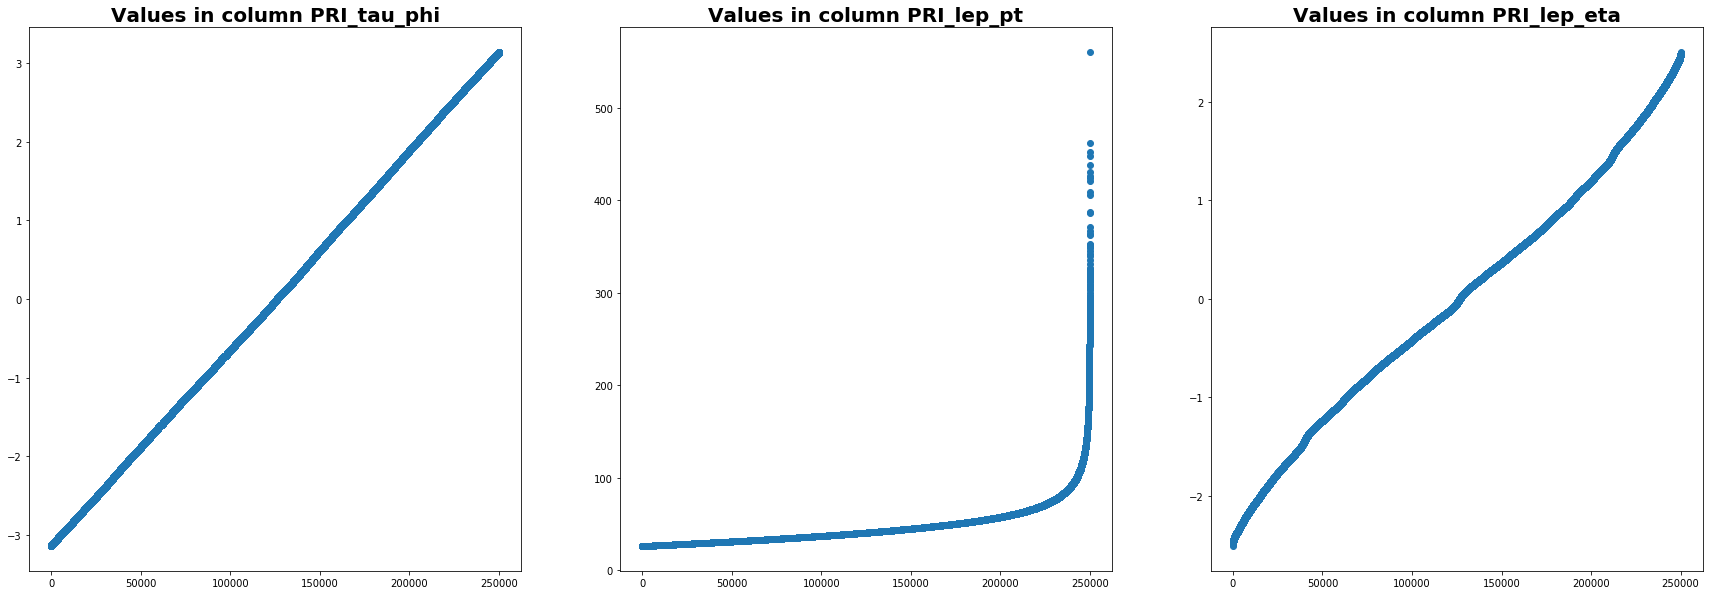

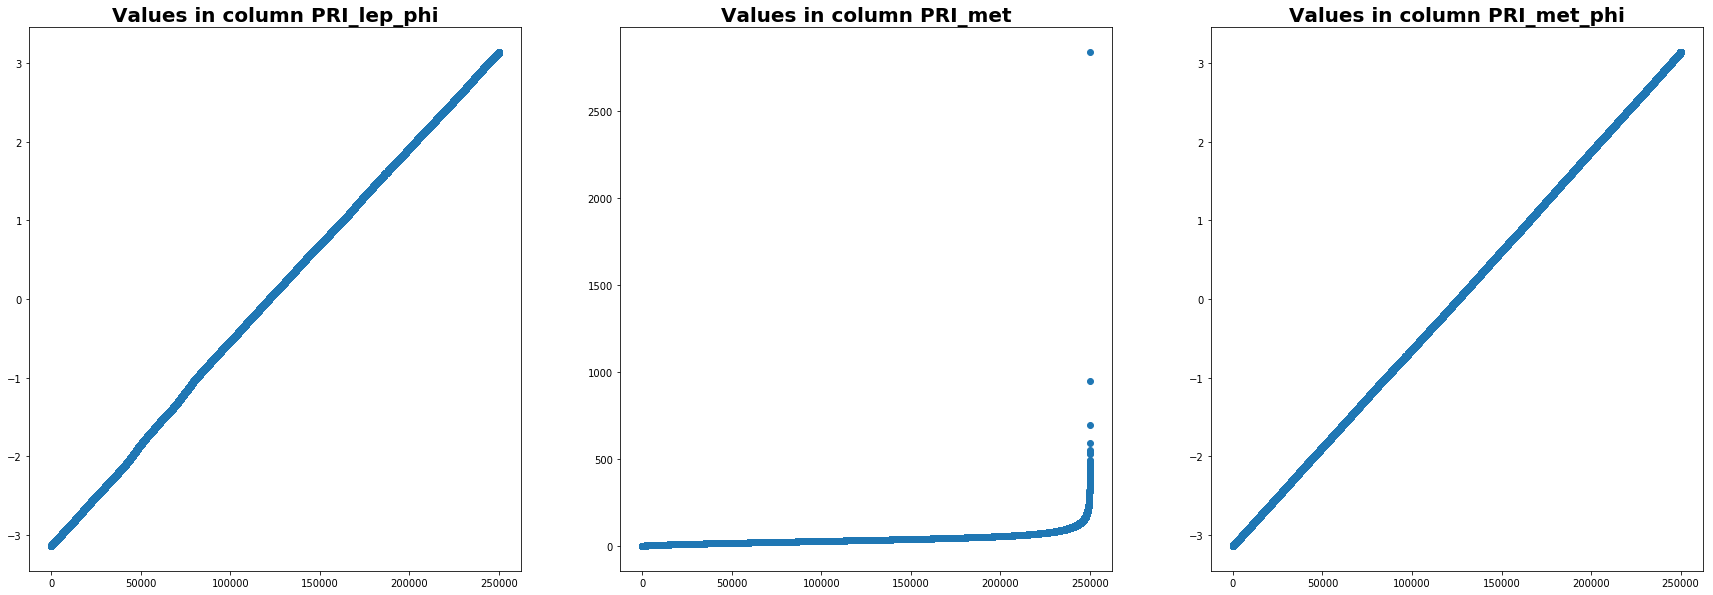

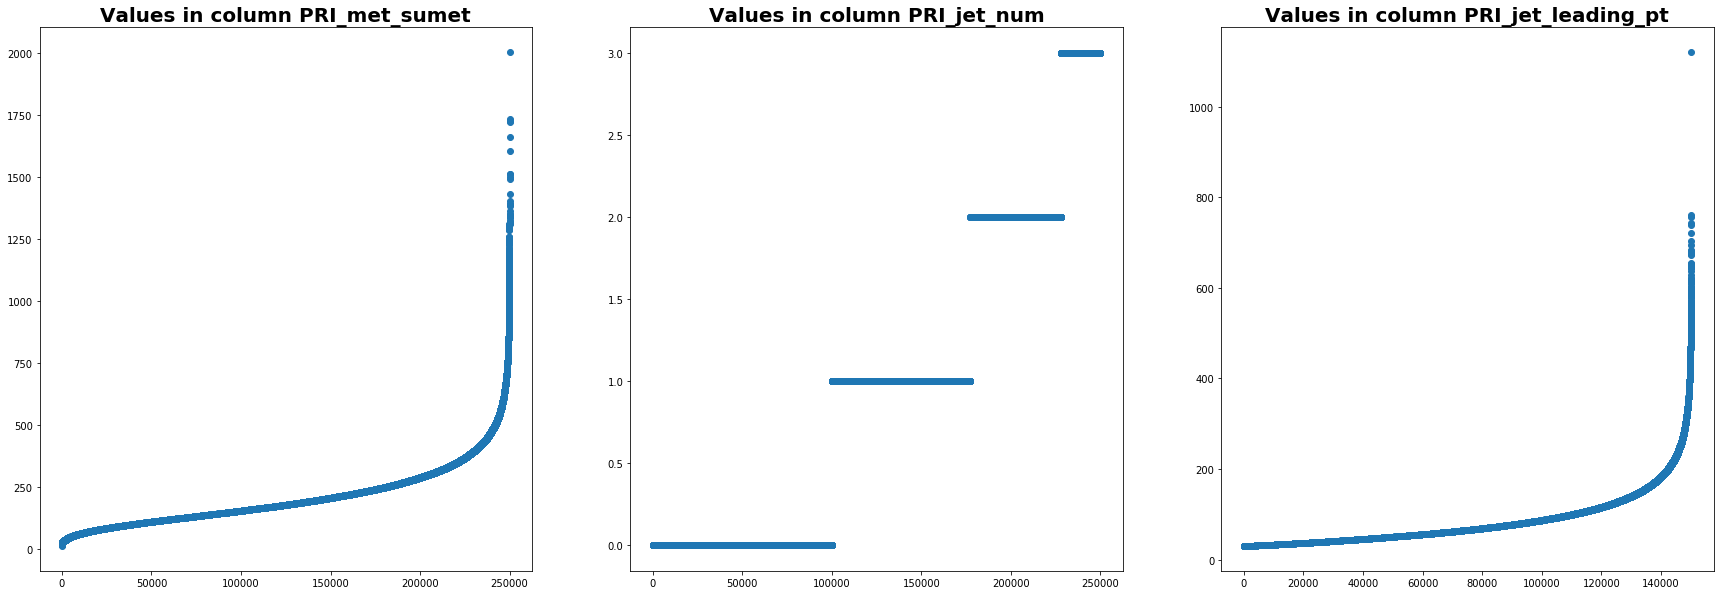

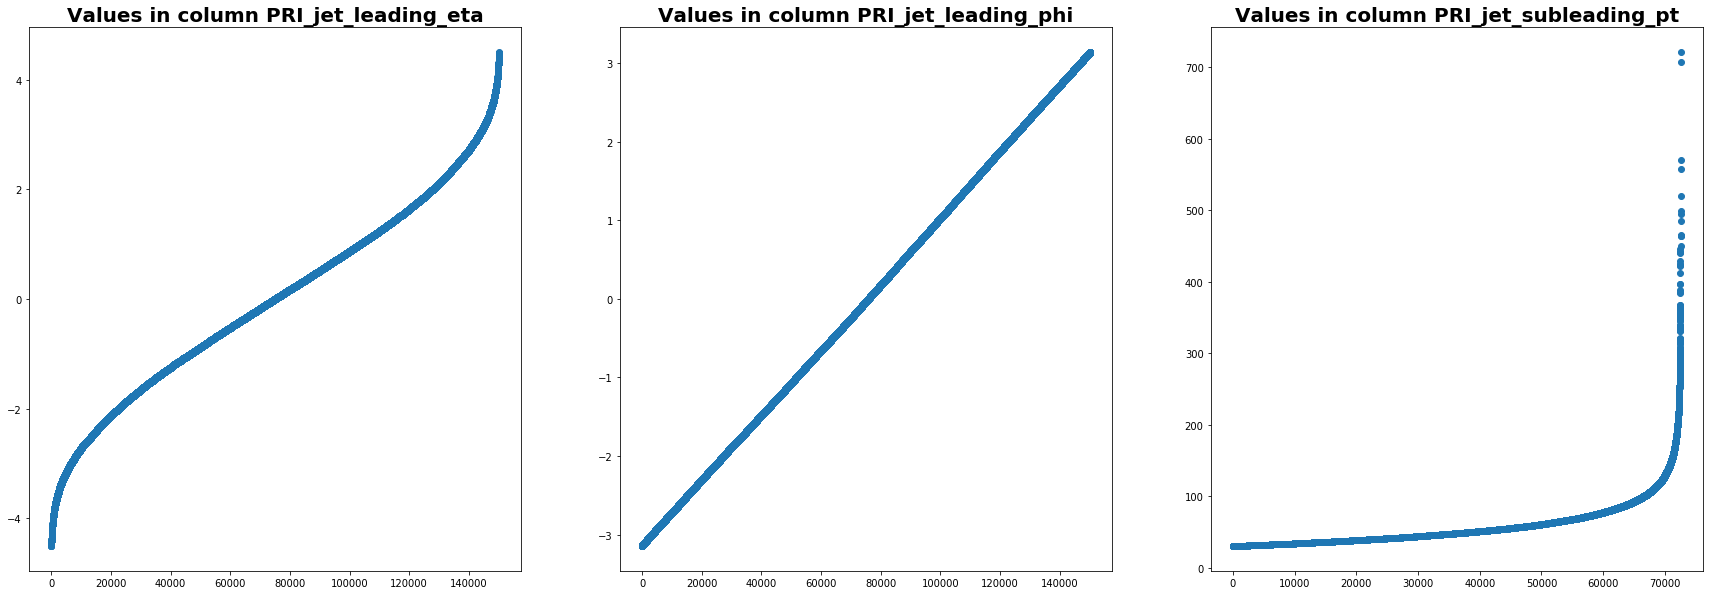

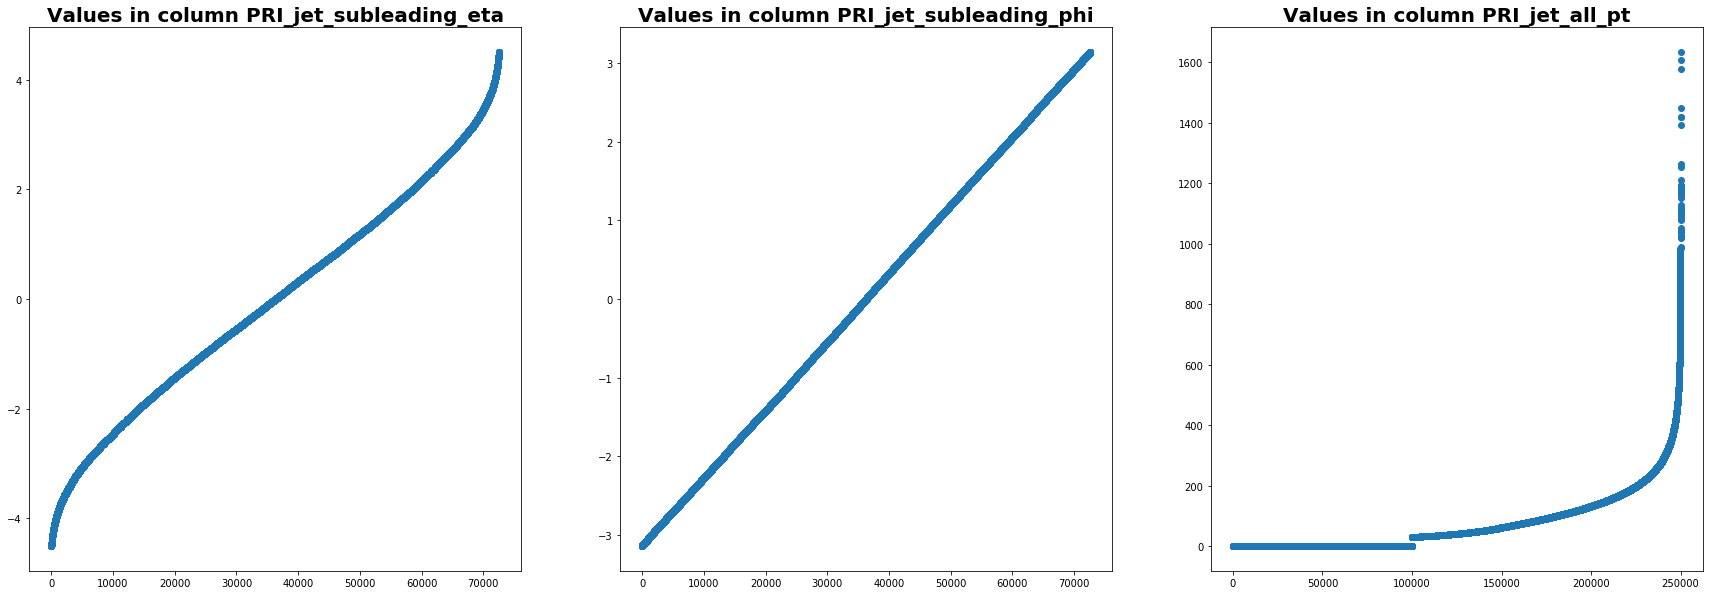

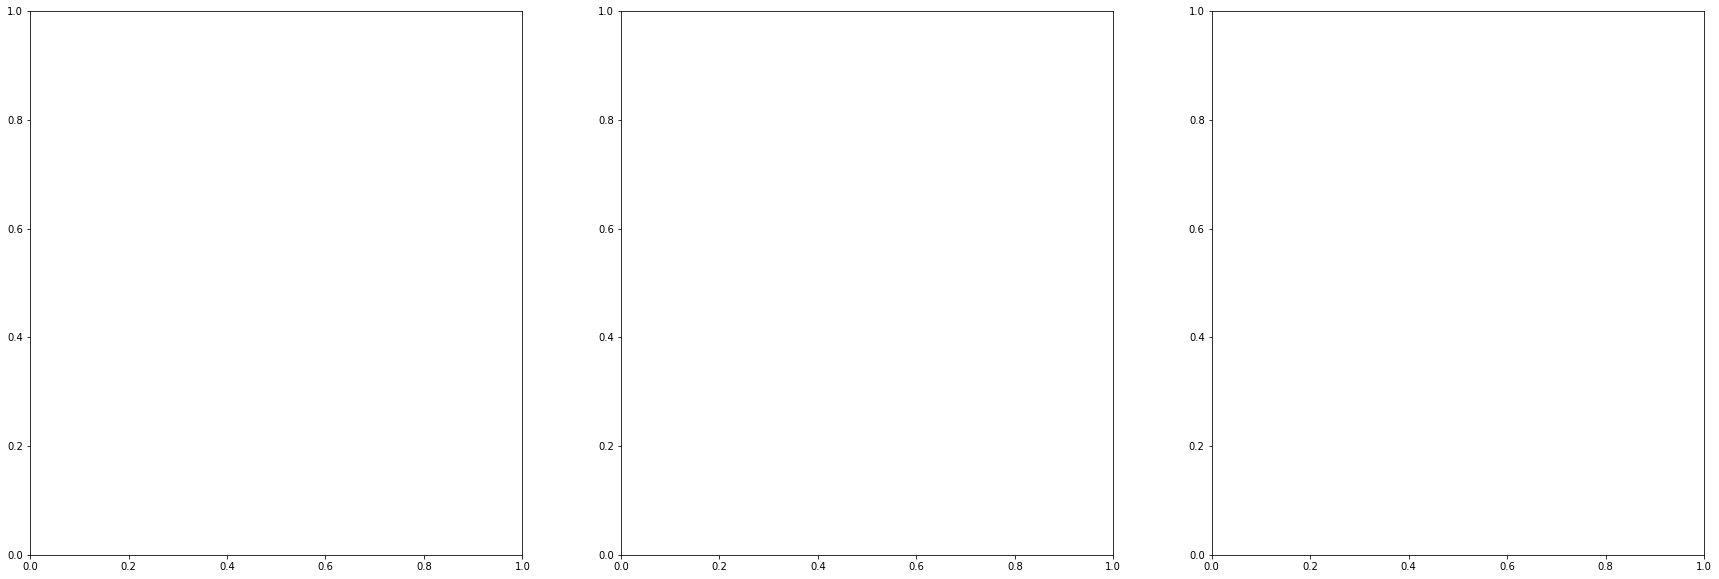

In [28]:
plots_values_train_test(train)

In [29]:
         
    #f, axarr = plt.subplots(2, 2)
    #axarr[0, 0].plot(x, y)
    #axarr[0, 0].set_title('Axis [0,0]')
    #axarr[0, 1].scatter(x, y)
    #axarr[0, 1].set_title('Axis [0,1]')
    #axarr[1, 0].plot(x, y ** 2)
    #axarr[1, 0].set_title('Axis [1,0]')
    #axarr[1, 1].scatter(x, y ** 2)
    #axarr[1, 1].set_title('Axis [1,1]')

# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
    #plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
    #plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

In [30]:
jet0.columns

Index(['index', 'DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [40]:
 def compare_jets(data,jet0,jet1,jet2,jet3,data_name):
    #needed_subplots = (len(jet0.columns)-1) # the first column being the index
    fig1, ax1 = plt.subplots(len(data.columns[0:]),4)
    fig1.set_figheight(len(data.columns[1:-1])*10)
    fig1.set_figwidth(30)
    my_list = [jet0,jet1,jet2,jet3]
    
    for k,column in enumerate (data.columns[1:]):
        for i,jet in enumerate(my_list):
            ax1[k,i].set_title('{} in jet{}'.format(column,i),fontsize=20,fontweight="bold")
            ax1[k,i].scatter(jet['index'],jet.sort_values([column])[column])


    fig1.savefig(data_name+' jet comparison.png', bbox_inches='tight')
            #for j in range(len(texts)):
             #   texts[j].set_fontsize(15)
              #  autotexts[j].set_fontsize(15)

In [41]:
 def compare_jets_tot(data,jet0,jet1,jet2,jet3,data_name):
    #needed_subplots = (len(jet0.columns)-1) # the first column being the index
    fig1, ax1 = plt.subplots(len(data.columns[0:]),4)
    fig1.set_figheight(len(data.columns[2:-1])*10)
    fig1.set_figwidth(30)
    my_list = [jet0,jet1,jet2,jet3]
    
    for k,column in enumerate (data.columns[2:]):
        for i,jet in enumerate(my_list):
            ax1[k,i].set_title('{} in jet{}'.format(column,i),fontsize=20,fontweight="bold")
            background = jet[jet['Prediction']==-1.0]
            signal = jet[jet['Prediction']==1.0]
            
            ax1[k,i].scatter(background['index'],\
                             background.sort_values([column])[column],\
                             color='b',s=0.01)
            
            ax1[k,i].scatter(signal['index'],\
                             signal.sort_values([column])[column],\
                             color='g',s=0.01)
            ax1[]


    fig1.savefig(data_name+' jet comparison.png', bbox_inches='tight')
            #for j in range(len(texts)):
             #   texts[j].set_fontsize(15)
              #  autotexts[j].set_fontsize(15)

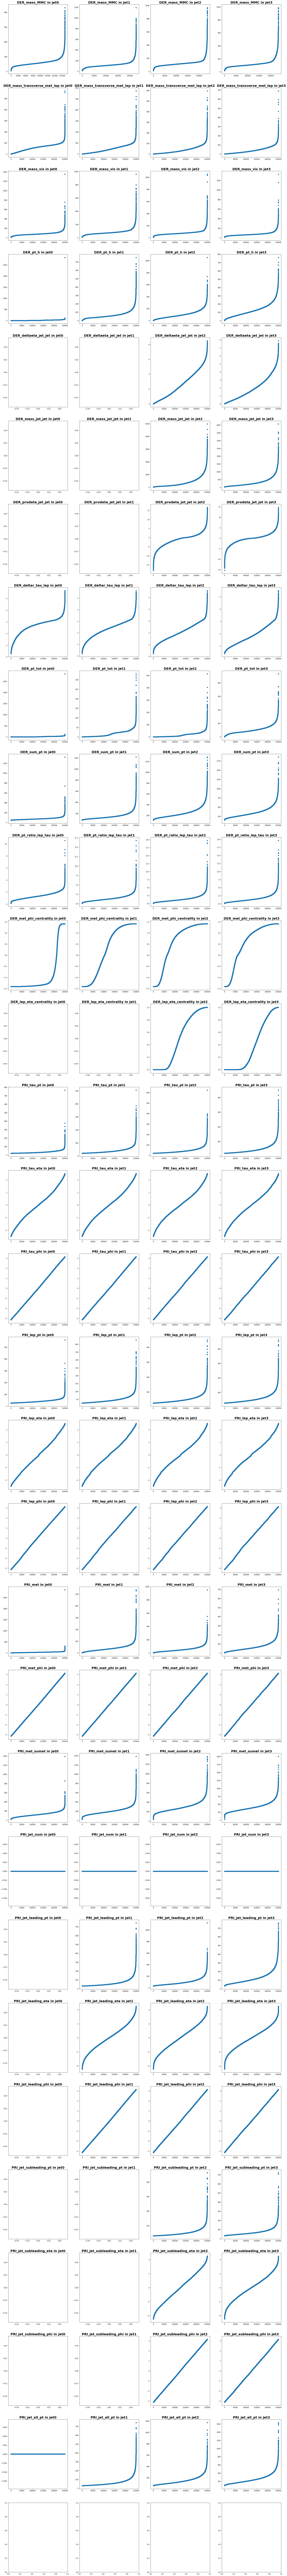

In [73]:
compare_jets(train,jet0,jet1,jet2,jet3,'train')

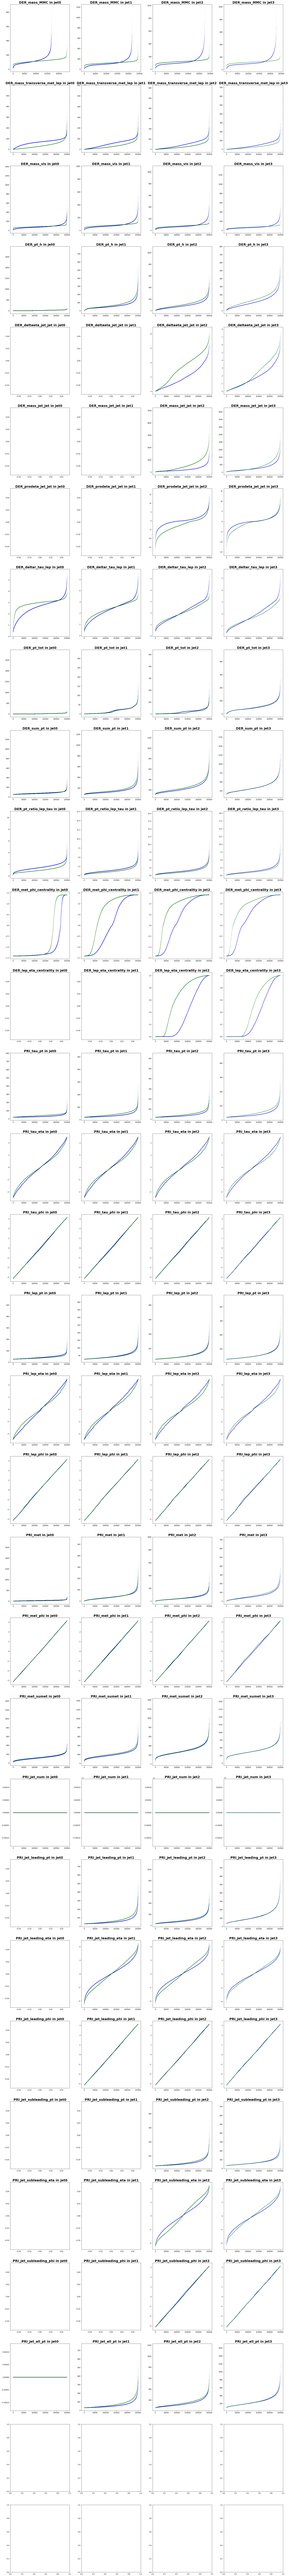

In [154]:
compare_jets_tot(train_tot,jet0,jet1,jet2,jet3,'train_tot')

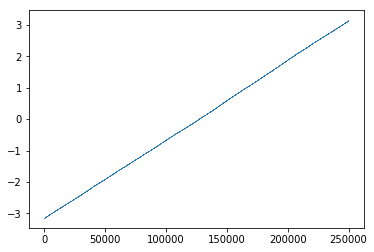

In [55]:
plt.scatter(jet0['index'],jet0.sort_values(['PRI_tau_phi'])['PRI_tau_phi'],s=0.00001)

## Writing this down in a file: 

In [243]:
def create_csv_file(ids, y_pred, name):
    """
    Creates an output file in csv format for submission to kaggle
    Arguments: ids (event ids associated with each prediction)
               y_pred (predicted class labels)
               name (string name of .csv output file to be created)
    """
    with open(name, 'w') as csvfile:
        fieldnames = ['Id', 'Prediction']
        writer = csv.DictWriter(csvfile, delimiter=",", fieldnames=fieldnames)
        writer.writeheader()
        for r1, r2 in zip(ids, y_pred):
            writer.writerow({'Id':int(r1),'Prediction':int(r2)})